# **Visualização de ações e indicadores técnicos**

Este é um exercício de visualização de dados financeiros. O objetivo
deste exercício é, através das bibliotecas matplotlib, numpy e pandas 
plotar e calcular alguns indicadores técnicos.

## **Importação dos dados**

Os dados referentes ao preços de abertura, fechamento,máxmima,mínima e ajuste podem ser obtidos gratuitamente do [Yahoo Finance](https://finance.yahoo.com/) A biblioteca pandas já apresenta uma função que realiza este tipo de tarefa, a get_data_yahoo. Para maiores informações https://pandas-datareader.readthedocs.io/en/latest/

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:

from pandas_datareader import data as pdr 

startDT = "2010-01-01"  #start date
endDT   = "2019-12-30"  # end date

dfPETR4 = pdr.get_data_yahoo("PETR4.SA", start=startDT, end=endDT)
dfVALE3 = pdr.get_data_yahoo("VALE3.SA", start=startDT, end=endDT)
dfABEV3 = pdr.get_data_yahoo("ABEV3.SA", start=startDT, end=endDT)
dfITUB4 = pdr.get_data_yahoo("ITUB4.SA", start=startDT, end=endDT)

dfITUB4

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,18.436810,17.708261,17.708261,18.268333,11843397.0,11.767267
2010-01-05,18.386723,18.168158,18.313868,18.386723,8593315.0,11.843526
2010-01-06,18.436810,18.077089,18.327526,18.227352,10602572.0,11.740873
2010-01-07,18.236460,18.008787,18.099855,18.040663,9966567.0,11.620620
2010-01-08,18.113516,17.721922,18.113516,17.767456,9748709.0,11.444633
...,...,...,...,...,...,...
2019-12-20,36.700001,36.299999,36.630001,36.500000,24863500.0,35.566170
2019-12-23,36.840000,36.310001,36.500000,36.840000,11691500.0,35.897465
2019-12-26,37.400002,36.650002,36.799999,37.400002,16333100.0,36.443146


Guardei 4 dataframes sendo um para cada ação, Petrobrás, Vale, Ambev e Itaú. Passei como parâmetro datas desde 2010 até 2019. 
Observamos na celula acima que as datas são usadas como os indices
do DataFrame. Não queremos isso ! Queremos as datas como a coluna 0. Vamos resetar o index e mover a data para a coluna 0. Isso
pode ser feito com reset_index. 

In [33]:
dfPETR4.reset_index(level=0, inplace=True)
dfVALE3.reset_index(level=0, inplace=True)
dfABEV3.reset_index(level=0, inplace=True)
dfITUB4.reset_index(level=0, inplace=True)

In [ ]:
dfVALE3

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,51.490002,49.799999,50.189999,51.490002,2381400.0,33.535347
1,2010-01-05,52.540001,51.240002,51.540001,51.970001,3001800.0,33.847961
2,2010-01-06,53.369999,51.779999,52.000000,53.070000,2742800.0,34.564396
3,2010-01-07,53.540001,52.500000,52.509998,53.290001,2543100.0,34.707680
4,2010-01-08,54.240002,53.000000,53.299999,53.810001,2444500.0,35.046356
...,...,...,...,...,...,...,...
2473,2019-12-20,54.990002,54.150002,54.770000,54.790001,42124200.0,51.233929
2474,2019-12-23,54.980000,54.400002,54.900002,54.580002,10225700.0,51.037560
2475,2019-12-26,55.000000,54.509998,54.810001,54.790001,20410000.0,51.233929
2476,2019-12-27,54.000000,53.419998,53.990002,53.599998,13920400.0,51.449287


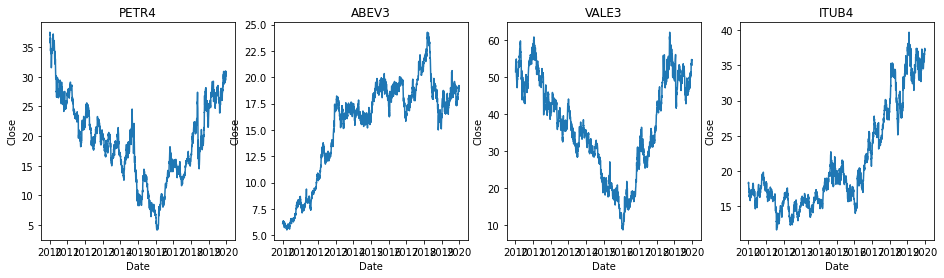

In [35]:


# Create just a figure and only one subplot
fig, axes = plt.subplots(1,4,figsize=(16,4))

axes[0].plot(dfPETR4['Date'],dfPETR4['Close'])
axes[1].plot(dfABEV3['Date'],dfABEV3['Close'])
axes[2].plot(dfVALE3['Date'],dfVALE3['Close'])
axes[3].plot(dfITUB4['Date'],dfITUB4['Close'])

axes[0].set_title('PETR4')
axes[1].set_title('ABEV3')
axes[2].set_title('VALE3')
axes[3].set_title('ITUB4')


for i in range(len(axes)) :
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Close')

OK ! Conseguimos visualizar o comportamento do preço de fechamento de cada ativo para cada dia do pregão desde 2010 até 2020. Apesar de termos uma ideia
da variação dos preços é comum no mercado financeiro, a variação de preços diária é comumente representada por meio de _candlesticks_. Isso pode ser feito em plotly por meio da go.Candlestick. Para mais detalhes, acesse : 
https://plotly.com/python/candlestick-charts/

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Candlestick(x=dfPETR4['Date'],
                open=dfPETR4['Open'], high=dfPETR4['High'],
                low=dfPETR4['Low'], close=dfPETR4['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False,
                  title='PETR4 diário',
                  yaxis_title='Preço',
                  autosize=False,
                  width=600,
                  height=500)


fig.show()

In [52]:
fig = go.Figure(data=[go.Candlestick(x=dfITUB4['Date'],
                open=dfITUB4['Open'], high=dfITUB4['High'],
                low=dfITUB4['Low'], close=dfITUB4['Close'])])


fig.update_layout(xaxis_rangeslider_visible=False,
                  title='ITUB4 diário',
                  yaxis_title='Preço',
                  autosize=False,
                  width=600,
                  height=500)

fig.show()

## **Inidicadores técnicos** 

Indicadores técnicos consistem de ferramentas matetmáticas que auxiliam na carcterização do movimento de preços. Os indicadores podem ser essencialmente divididos em 3 grupos sendo eles: médias móvies, indicadores de volume e osciladores. 

As médias móveis representam o valor médio dos preços em uma dada janela temporal. A medida que o tempo passa, essa janela se desloca e por isso nome média móvel. As médias móveis mais utilizadas são: média móvel aritmética (MMA), média móvel ponderada (MMP) e média móvel exponencial (MME).  

### **Média móvel aritmética (MMA)**

A média móvel aritmética, como o próprio nome já diz, é a média dos preços em um dado intervalo de tempo (periodo). Vamos fazer o exemplo da MMA calculada sobre o preço de fechamento do ativo para diferentes períodos.

In [69]:
# moving average - 20,50 and 200 periods
MMA20  = dfITUB4.Close.rolling(window=20,min_periods=1).mean()
MMA50  = dfITUB4.Close.rolling(window=50,min_periods=1).mean()
MMA200 = dfITUB4.Close.rolling(window=200,min_periods=1).mean()

fig = go.Figure(data=[go.Candlestick(x=dfITUB4['Date'],
                open=dfITUB4['Open'], high=dfITUB4['High'],
                low=dfITUB4['Low'], close=dfITUB4['Close']),
                go.Scatter(x=dfITUB4.Date, y=MMA20, 
                           line=dict(color='blue', width=1)),
                go.Scatter(x=dfITUB4.Date, y=MMA50, 
                           line=dict(color='orange', width=1)),
                go.Scatter(x=dfITUB4.Date, y=MMA200, 
                           line=dict(color='magenta', width=1)),
                      ])
                          

fig.update_layout(xaxis_rangeslider_visible=False,
                  title='ITUB4 diário',
                  yaxis_title='Preço',
                  autosize=False,
                  width=600,
                  height=500)

fig.show()





## **Determinação de suportes e resistências**